## Basic Exploratory Data Analysis of the features of the Unicorn Companies
The dataset contains the information of different unicorn companies, The dataset is produced by quantum analytics

In [3]:
# import necessary libraries
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# load and read the dataset
unicorn_data = pd.read_csv(r'C:\Users\pro 7\Desktop\Harry\JUNE COHORT\PYTHON CLASS\DATASET\Unicorn_Companies.csv')
unicorn_data

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors
0,Bytedance,$180B,4/7/2017,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$100B,12/1/2012,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,$100B,7/3/2018,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,$95B,1/23/2014,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG"
4,Klarna,$46B,12/12/2011,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita..."
...,...,...,...,...,...,...,...,...,...,...
1069,Zhaogang,$1B,6/29/2017,E-commerce & direct-to-consumer,Shanghai,China,Asia,2012,$379M,"K2 Ventures, Matrix Partners China, IDG Capital"
1070,Zhuan Zhuan,$1B,4/18/2017,E-commerce & direct-to-consumer,Beijing,China,Asia,2015,$990M,"58.com, Tencent Holdings"
1071,Zihaiguo,$1B,5/6/2021,Consumer & retail,Chongqing,China,Asia,2018,$80M,"Xingwang Investment Management, China Capital ..."
1072,Zopa,$1B,10/19/2021,Fintech,London,United Kingdom,Europe,2005,$792M,"IAG Capital Partners, Augmentum Fintech, North..."


## Data Inspection and manipulation

In [5]:
# shape of the data
unicorn_data.shape

(1074, 10)

In [6]:
unicorn_data.info()

# shape of the data
unicorn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1074 entries, 0 to 1073
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Company           1074 non-null   object
 1   Valuation         1074 non-null   object
 2   Date Joined       1074 non-null   object
 3   Industry          1074 non-null   object
 4   City              1058 non-null   object
 5   Country           1074 non-null   object
 6   Continent         1074 non-null   object
 7   Year Founded      1074 non-null   int64 
 8   Funding           1074 non-null   object
 9   Select Investors  1073 non-null   object
dtypes: int64(1), object(9)
memory usage: 84.0+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1074 entries, 0 to 1073
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Company           1074 non-null   object
 1   Valuation         1074 non-null   object

### there is a missing value, that is selected investors are 1073, and city are 1058

In [7]:
# Check for the missing vslues
unicorn_data.isnull().sum()

Company              0
Valuation            0
Date Joined          0
Industry             0
City                16
Country              0
Continent            0
Year Founded         0
Funding              0
Select Investors     1
dtype: int64

### We have 16 values missing at city, while 1 is missing at select investors

In [8]:
# Data validation

# Define a function to convert M and B to millions and billions respectively
def convert_to_number(x):
    if x[-1] == 'M':
        return float(x[:-1])* 1e6
    elif x[-1] == 'B':
        return float(x[:-1])* 1e9
    else:
        return x
    
# convert the valuation column to float
unicorn_data['Valuation'] = unicorn_data['Valuation'].astype(str).str.replace('$', '').apply(convert_to_number).astype(float)

# convert the funding column as float
unicorn_data['Funding'] = unicorn_data['Funding'].replace('Unknown', '0').str.replace('$', '').str.replace('M', '000000').str.replace('B', '000000000').apply(convert_to_number).astype(float)

# print the updated dataframe
unicorn_data.head()

C:\Users\pro 7\AppData\Local\Temp\ipykernel_36164\1934821299.py:13: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  unicorn_data['Valuation'] = unicorn_data['Valuation'].astype(str).str.replace('$', '').apply(convert_to_number).astype(float)
C:\Users\pro 7\AppData\Local\Temp\ipykernel_36164\1934821299.py:16: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  unicorn_data['Funding'] = unicorn_data['Funding'].replace('Unknown', '0').str.replace('$', '').str.replace('M', '000000').str.replace('B', '000000000').apply(convert_to_number).astype(float)


,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors
0,Bytedance,1.800000e+11,4/7/2017,Artificial intelligence,Beijing,China,Asia,2012,8.000000e+09,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,1.000000e+11,12/1/2012,Other,Hawthorne,United States,North America,2002,7.000000e+09,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,1.000000e+11,7/3/2018,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,2.000000e+09,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,9.500000e+10,1/23/2014,Fintech,San Francisco,United States,North America,2010,2.000000e+09,"Khosla Ventures, LowercaseCapital, capitalG"
4,Klarna,4.600000e+10,12/12/2011,Fintech,Stockholm,Sweden,Europe,2005,4.000000e+09,"Institutional Venture Partners, Sequoia Capita..."


In [9]:
unicorn_data.dtypes

Company              object
Valuation           float64
Date Joined          object
Industry             object
City                 object
Country              object
Continent            object
Year Founded          int64
Funding             float64
Select Investors     object
dtype: object

In [12]:
# convert Date Joined and Year Founded to Datetime

# convert the date joined to datetime
unicorn_data['Date Joined'] = pd.to_datetime(unicorn_data['Date Joined'])

# convert the Year Founded to datetime
unicorn_data['Year Founded'] = pd.to_datetime(unicorn_data['Year Founded'], format = '%Y')

In [13]:
unicorn_data.dtypes

Company                     object
Valuation                  float64
Date Joined         datetime64[ns]
Industry                    object
City                        object
Country                     object
Continent                   object
Year Founded        datetime64[ns]
Funding                    float64
Select Investors            object
dtype: object

In [14]:
# calculate the age of the company at the time it joined the unicorn company
unicorn_data['Age of joining'] = ((unicorn_data['Date Joined'] - unicorn_data['Year Founded']).dt.days / 365).round(1)

# print updated DataFrsme
unicorn_data.head()


,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors,Age of joining
0,Bytedance,1.800000e+11,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012-01-01,8.000000e+09,"Sequoia Capital China, SIG Asia Investments, S...",5.3
1,SpaceX,1.000000e+11,2012-12-01,Other,Hawthorne,United States,North America,2002-01-01,7.000000e+09,"Founders Fund, Draper Fisher Jurvetson, Rothen...",10.9
2,SHEIN,1.000000e+11,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008-01-01,2.000000e+09,"Tiger Global Management, Sequoia Capital China...",10.5
3,Stripe,9.500000e+10,2014-01-23,Fintech,San Francisco,United States,North America,2010-01-01,2.000000e+09,"Khosla Ventures, LowercaseCapital, capitalG",4.1
4,Klarna,4.600000e+10,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005-01-01,4.000000e+09,"Institutional Venture Partners, Sequoia Capita...",6.9


In [15]:
# To fill the missing values

# apply the ffill method to the 'CITY' and 'SELECT INVESTORS' columns
unicorn_data['City'] = unicorn_data['City'].ffill()
unicorn_data['Select Investors'] = unicorn_data['Select Investors'].ffill()

# print the updated DataFrame
unicorn_data.head()

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors,Age of joining
0,Bytedance,1.800000e+11,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012-01-01,8.000000e+09,"Sequoia Capital China, SIG Asia Investments, S...",5.3
1,SpaceX,1.000000e+11,2012-12-01,Other,Hawthorne,United States,North America,2002-01-01,7.000000e+09,"Founders Fund, Draper Fisher Jurvetson, Rothen...",10.9
2,SHEIN,1.000000e+11,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008-01-01,2.000000e+09,"Tiger Global Management, Sequoia Capital China...",10.5
3,Stripe,9.500000e+10,2014-01-23,Fintech,San Francisco,United States,North America,2010-01-01,2.000000e+09,"Khosla Ventures, LowercaseCapital, capitalG",4.1
4,Klarna,4.600000e+10,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005-01-01,4.000000e+09,"Institutional Venture Partners, Sequoia Capita...",6.9


In [16]:
# to check if there is still a msissing value
unicorn_data.isnull().sum()

Company             0
Valuation           0
Date Joined         0
Industry            0
City                0
Country             0
Continent           0
Year Founded        0
Funding             0
Select Investors    0
Age of joining      0
dtype: int64

## The missing values has been filled

In [19]:
import pandas as pd
# Save the clean dataset to a new file
unicorn_data.to_csv('clean_dataset.csv', index=False)

## Exploratory Data Analysis: 

- Insight and Visualization

- Univariate Analysis
- Bivariate Analysis
- Multivariate Analysis

## Return on Investment

In [17]:
# change the infinity to float
unicorn_data['ROI'] = unicorn_data['Valuation'] / unicorn_data['Funding']

unicorn_data.replace([float('inf'), float('-inf')], [0, 0], inplace=True)

unicorn_data.sort_values(by='ROI', ascending=False).head(10)

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors,Age of joining,ROI
239,Zapier,4.000000e+09,2021-01-14,Internet software & services,Sunnyvale,United States,North America,2011-01-01,1000000.0,"Sequoia Capital, Bessemer Venture Partners, Th...",10.0,4000.000000
61,Dunamu,9.000000e+09,2021-07-22,Fintech,Seoul,South Korea,Asia,2012-01-01,71000000.0,"Qualcomm Ventures, Woori Investment, Hanwha In...",9.6,126.760563
792,Workhuman,1.000000e+09,2020-06-23,Internet software & services,Dublin,Ireland,Europe,1999-01-01,9000000.0,ICG,21.5,111.111111
361,CFGI,2.000000e+09,2021-09-15,Fintech,Boston,United States,North America,2000-01-01,19000000.0,"The Carlyle Group, CVC Capital Partners",21.7,105.263158
743,Manner,1.000000e+09,2020-12-24,Other,Shanghai,China,Asia,2015-01-01,10000000.0,"Coatue Management, H Capital, Capital Today",6.0,100.000000
72,DJI Innovations,8.000000e+09,2015-01-23,Hardware,Shenzhen,China,Asia,2006-01-01,105000000.0,"Accel Partners, Sequoia Capital",9.1,76.190476
760,GalaxySpace,1.000000e+09,2020-11-17,Mobile & telecommunications,Beijing,China,Asia,2016-01-01,14000000.0,"Shunwei Capital Partners, 5Y Capital, Legend C...",4.9,71.428571
5,Canva,4.000000e+10,2018-01-08,Internet software & services,Surry Hills,Australia,Oceania,2012-01-01,572000000.0,"Sequoia Capital China, Blackbird Ventures, Mat...",6.0,69.930070
368,Il Makiage,2.000000e+09,2022-01-10,E-commerce & direct-to-consumer,New York,United States,North America,2018-01-01,29000000.0,"L Catterton, Franklin Templeton, First Light C...",4.0,68.965517
1012,Revolution Precrafted,1.000000e+09,2017-10-23,Other,Manila,Philippines,Asia,2015-01-01,15000000.0,"K2 Global, 500 Startups",2.8,66.666667


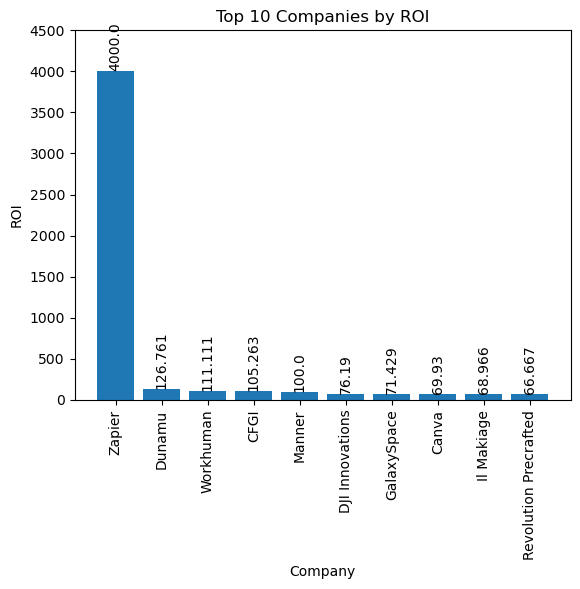

In [18]:
# To visualize using bar chat

import matplotlib.pyplot as plt

# Sort the companies by ROI in descending order and get the top 10
top_10 = unicorn_data.sort_values(by='ROI', ascending=False).head(10)

# Get bar names and heights
bar_names = top_10['Company'].astype(str).to_list()
bar_heights = top_10['ROI'].astype(float).to_list()

# Create a bar chart of the top 10 companies by ROI
plt.bar(top_10['Company'], top_10['ROI'].round(3))
plt.xticks(rotation=90)
plt.xlabel('Company')
plt.ylabel('ROI')
plt.title('Top 10 Companies by ROI')
plt.ylim(0, 4500)  # Set the minimum to 0 and the maximum to 50

# Rotate data labels vertically
plt.xticks(rotation='vertical')

# Annotate each bar with its value
for i, v in enumerate(top_10['ROI'].round(3)):
    plt.text(i, v + 1, str(v), ha='center', va='bottom', rotation='vertical')
    
plt.show()

# Observation
The chart shows top 10 unicorn companies with the highest return on investment (ROI). 
These companies have been most successful in generating returns for their investors.

## How long does it usually take for a company to become a unicorn? 
- Has it always been this way?

In [124]:
# To know how long does it usually take for a company to become a unicorn?

unicorn_data['Founded Date'] = pd.to_datetime(unicorn_data['Year Founded'])
unicorn_data
unicorn_data['Time to Unicorn'] = (pd.to_datetime(unicorn_data['Date Joined']) - unicorn_data['Year Founded']).dt.days
print(f"Average time to become a unicorn: {unicorn_data['Time to Unicorn'].mean()} days")
avg_time_to_unicorn = unicorn_data['Time to Unicorn'].mean() / 365

print(f"Average time to become a unicorn: {avg_time_to_unicorn:.2f} years")

Average time to become a unicorn: 2734.1415270018624 days
Average time to become a unicorn: 7.49 years


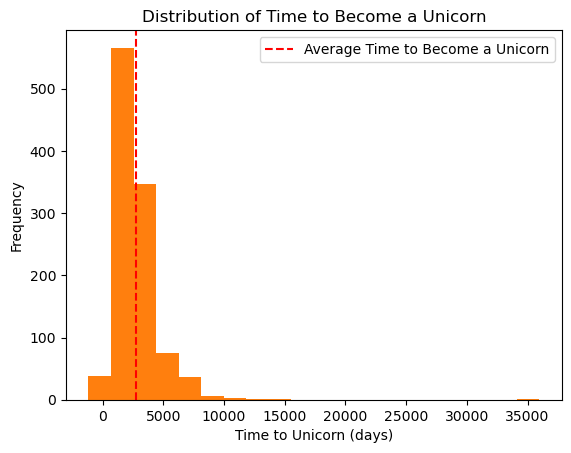

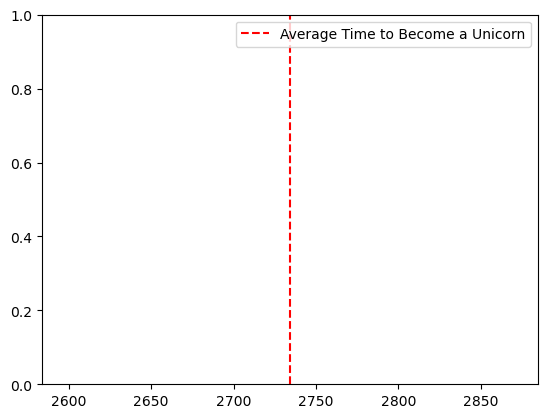

In [147]:
import matplotlib.pyplot as plt

# Convert the 'Year Founded' column to datetime format
unicorn_data['Year Founded'] = pd.to_datetime(unicorn_data['Year Founded'])

# Calculate the time to unicorn
unicorn_data['Time to Unicorn'] = (pd.to_datetime(unicorn_data['Date Joined']) - unicorn_data['Year Founded']).dt.days

# Get the average time to unicorn
average_time_to_unicorn = unicorn_data['Time to Unicorn'].mean()

# Create a histogram of the 'Time to Unicorn' data
plt.hist(unicorn_data['Time to Unicorn'], bins=20)
plt.xlabel('Time to Unicorn (days)')
plt.ylabel('Frequency')
plt.title('Distribution of Time to Become a Unicorn')

# Convert the 'Year Founded' column to datetime format
unicorn_data['Year Founded'] = pd.to_datetime(unicorn_data['Year Founded'])

# Calculate the time to unicorn
unicorn_data['Time to Unicorn'] = (pd.to_datetime(unicorn_data['Date Joined']) - unicorn_data['Year Founded']).dt.days

# Get the average time to unicorn
average_time_to_unicorn = unicorn_data['Time to Unicorn'].mean()

# Create a histogram of the 'Time to Unicorn' data
plt.hist(unicorn_data['Time to Unicorn'], bins=20)
plt.xlabel('Time to Unicorn (days)')
plt.ylabel('Frequency')
plt.title('Distribution of Time to Become a Unicorn')
plt.axvline(x=avg_time_to_unicorn*365, color='r', linestyle='--', label='Average Time to Become a Unicorn')
plt.legend()
plt.show()
plt.axvline(x=avg_time_to_unicorn*365, color='r', linestyle='--', label='Average Time to Become a Unicorn')
plt.legend()
plt.show()


## Observation
- This means that, on average, it takes about 7.4 years for a company to become a unicorn in this dataset-
- The output of the code is a histogram that shows the number of companies that took a certain amount of time to become a unicorn. The average time to unicorn is also shown on the plot, which is 2734 days.This visualization can help us to understand how the time to unicorn is distributed among unicorn companies. We can see that the majority of companies took less than 10 years to become unicorns. However, there are also a few companies that took much longer.
- To know if it has always been this way, with the average time it took for a company to become a unicorn. This suggests that the time it takes for a company to become a unicorn has been decreasing over time, and needs to decrease more. I think startup has become more efficient. This means that it is easier for startups to raise money and get to market in other to make it more competitive. This means that startups need to grow and scale more quickly in order to achieve a high valuation.

## Which countries have the most unicorns?
- Are there any cities that appear to be industry hubs?

In [148]:
# To know which countries have the most unicorns

# Get the number of unicorns in each country
n_unicorns_per_country = unicorn_data['Country'].value_counts()

# Get the top 10 countries with the most unicorns
top_10_countries = n_unicorns_per_country.sort_values(ascending=False).head(10)

# Print the top 10 countries
print(top_10_countries)

United States     562
China             173
India              65
United Kingdom     43
Germany            26
France             24
Israel             20
Canada             19
Brazil             16
Singapore          12
Name: Country, dtype: int64


In [149]:
# To know if there are cities that appear to be industry hub

# Get the number of unicorns in each city
n_unicorns_per_city = unicorn_data['City'].value_counts()

# Get the top 10 cities with the most unicorns
top_10_cities = n_unicorns_per_city.sort_values(ascending=False).head(10)

# Print the top 10 cities
print(top_10_cities)

San Francisco    153
New York         108
Beijing           65
Shanghai          44
London            35
Bengaluru         29
Shenzhen          20
Paris             19
Palo Alto         18
Berlin            18
Name: City, dtype: int64


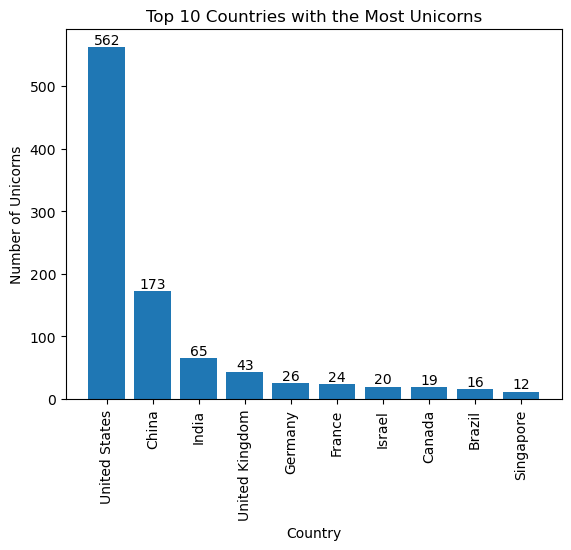

In [151]:
# To visualize which country has the most unicorns

# Get the top 10 countries with the most unicorns
top_10_countries = n_unicorns_per_country.sort_values(ascending=False).head(10)

# Create a bar chart of the top 10 countries with the most unicorns
plt.bar(top_10_countries.index, top_10_countries.values)
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Number of Unicorns')
plt.title('Top 10 Countries with the Most Unicorns')

# Add data labels to the bars
for i, v in enumerate(top_10_countries.values):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.show()


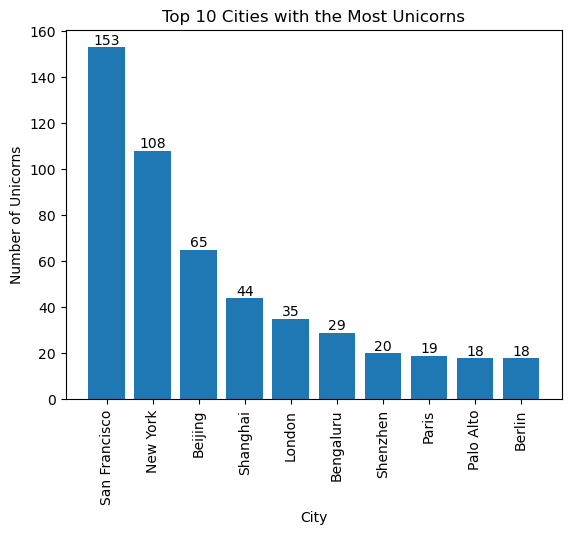

In [152]:
# to visualize cities that her in dustry hub

# Get the number of unicorns in each city
n_unicorns_per_city = unicorn_data['City'].value_counts()

# Get the top 10 cities with the most unicorns
top_10_cities = n_unicorns_per_city.sort_values(ascending=False).head(10)

# Create a bar chart of the top 10 cities with the most unicorns
plt.bar(top_10_cities.index, top_10_cities.values)
plt.xticks(rotation=90)
plt.xlabel('City')
plt.ylabel('Number of Unicorns')
plt.title('Top 10 Cities with the Most Unicorns')

# Add data labels to the bars
for i, v in enumerate(top_10_cities.values):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.show()

## Observation
- We can see the top 10 countries with the most unicorns,is united state, followed by China, Also we can see that San Francisco and New York City have the most unicorns, followed by Beijing and Shanghai. This suggests that these cities are major hubs for technology and innovation. We can also see that some cities appear to be industry hubs within a country. For example, Paris is a major hub for the technology industry in France. Similarly, Berlin is a major hub for the technology industry in Germany.

## Which investors have funded the most unicorns?

In [154]:
# To know Which investors have funded the most unicorns?

# Get the number of unicorns funded by each investor
n_unicorns_per_investor = unicorn_data['Select Investors'].value_counts()

# Get the top 10 investors with the most unicorns
top_10_investors = n_unicorns_per_investor.sort_values(ascending=False).head(10)

# Print the top 10 investors
print(top_10_investors)

Sequoia Capital                                                     3
Qualcomm Ventures, Accel, Canaan Partners                           2
Pelion Venture Partners, Foundation Capital, Thoma Bravo            2
Two Sigma Ventures, Flint Capital, Commerce Ventures                2
Undisclosed                                                         2
Tiger Global Management, Sequoia Capital India, Ribbit Capital      2
Global Founders Capital, Shea Ventures, Greycroft                   2
Sequoia Capital China, Qiming Venture Partners, Tencent Holdings    2
Greylock Partners, Google Ventures, BlackRock                       2
General Atlantic                                                    2
Name: Select Investors, dtype: int64


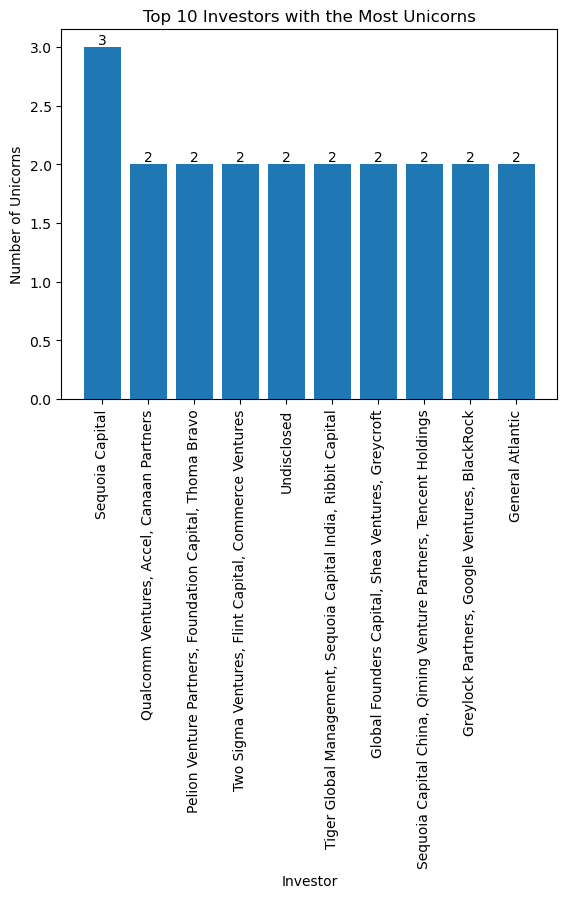

In [155]:
# To Visualize Which investors have funded the most unicorns

# Create a bar chart of the top 10 investors with the most unicorns
plt.bar(top_10_investors.index, top_10_investors.values)
plt.xticks(rotation=90)
plt.xlabel('Investor')
plt.ylabel('Number of Unicorns')
plt.title('Top 10 Investors with the Most Unicorns')

# Add data labels to the bars
for i, v in enumerate(top_10_investors.values):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.show()

## Observation
- It is observed that Sequoia Capital has funded the most unicorns, followed by others. This suggests that these investors are very active in the venture capital space and have a good track record of identifying and investing in successful startups.

##  What are the average valuation of all the unicorn companies

In [156]:
# what are the average valuation of all the unicorn companies

# Get the valuation of each unicorn company
valuations = unicorn_data['Valuation']

# Calculate the average valuation
average_valuation = valuations.mean()

# Print the average valuation
print('The average valuation of all the unicorn companies is', average_valuation)

The average valuation of all the unicorn companies is 3455307262.5698323


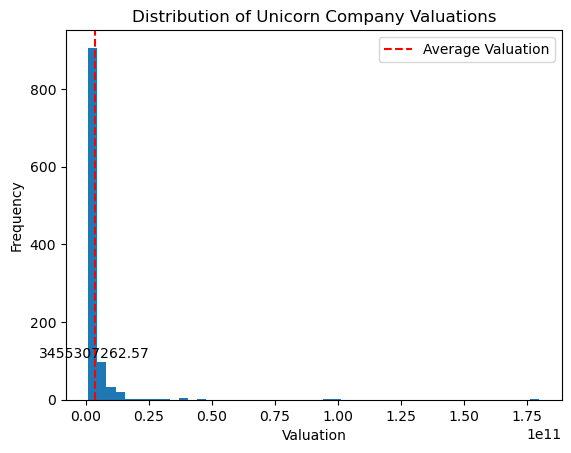

In [166]:
# To visualize the average valuation of all the unicorn companies

import pandas as pd
import matplotlib.pyplot as plt

# Create a histogram of the unicorn company valuations
plt.hist(valuations, bins=50)
plt.xlabel('Valuation')
plt.ylabel('Frequency')
plt.title('Distribution of Unicorn Company Valuations')

# Add a vertical line for the average valuation
plt.axvline(x=average_valuation, color='red', linestyle='--', label='Average Valuation')

# Add a data label for the average valuation
plt.text(average_valuation, 100, f'{average_valuation:.2f}', ha='center', va='bottom')

plt.legend()
plt.show()

## Observation
- It is observed that the distribution of the valuations of all the unicorn companies are generally distributed between 100 million USD and 5 billion USD. The average valuation is also shown on the plot.

## What are the geographic trends in the creation of unicorn companies

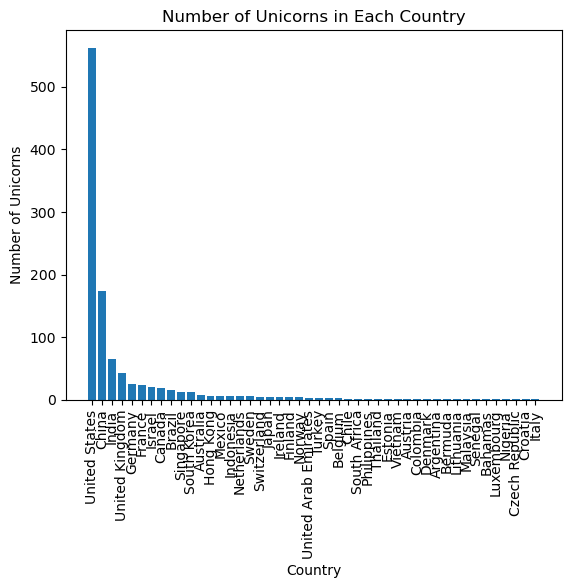

In [167]:
# What are the geographic trends in the creation of unicorn companies

# Get the number of unicorns in each country
n_unicorns_per_country = unicorn_data['Country'].value_counts()

# Get bar names
bar_names = n_unicorns_per_country.index.astype(str).to_list()

# Get maximum bar name string lengths
max_name_length = 0
for name in bar_names:
  max_name_length = max(max_name_length, len(name))

# Get total number of bars
n_bars = len(bar_names)

# Rotate x axis labels if number of bars and max_name_length are large
if n_bars * max_name_length >= 50:
  if n_bars >= 20:
    plt.xticks(rotation=90)
  else:
    plt.xticks(rotation=45)

# Create a bar chart of the number of unicorns in each country
plt.bar(n_unicorns_per_country.index, n_unicorns_per_country.values)
plt.xlabel('Country')
plt.ylabel('Number of Unicorns')
plt.title('Number of Unicorns in Each Country')
plt.show()

## Observation
- The United States has the most unicorn companies, followed by China and India. This suggests that these countries are major hubs for technology and innovation.There are a growing number of unicorn companies in emerging markets, such as Southeast Asia.There are a few countries, such as Japan and South Korea, that have a relatively small number of unicorn companies compared to their size and economic development.These observations suggest that the geographic trends in the creation of unicorn companies are changing. In the past, the United States was the dominant force in the creation of unicorn companies. However, in recent years, there has been a growing number of unicorn companies being created in other countries, particularly in emerging markets. This suggests that the global technology landscape is becoming more diversified.

## What are the most common industries for unicorn companies?

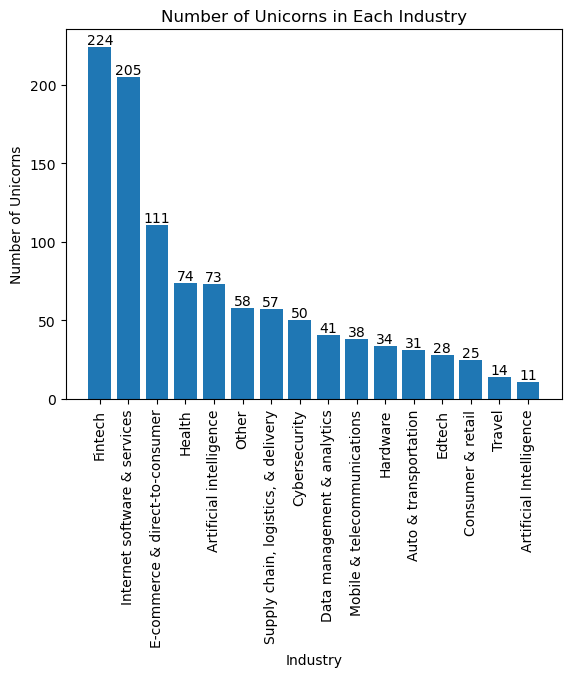

In [170]:
# to show the common industries for unicorn companies

import pandas as pd
import matplotlib.pyplot as plt


# Get the number of unicorns in each industry
n_unicorns_per_industry = unicorn_data['Industry'].value_counts()

# Get bar names
bar_names = n_unicorns_per_industry.index.astype(str).to_list()

# Get maximum bar name string lengths
max_name_length = 0
for name in bar_names:
  max_name_length = max(max_name_length, len(name))

# Get total number of bars
n_bars = len(bar_names)

# Rotate x axis labels if number of bars and max_name_length are large
if n_bars * max_name_length >= 50:
  if n_bars >= 15:
    plt.xticks(rotation=90)
  else:
    plt.xticks(rotation=45)

# Create a bar chart of the number of unicorns in each industry
plt.bar(n_unicorns_per_industry.index, n_unicorns_per_industry.values)
plt.xlabel('Industry')
plt.ylabel('Number of Unicorns')
plt.title('Number of Unicorns in Each Industry')

# Add data labels to the bar chart
for i in range(n_bars):
  plt.text(i, n_unicorns_per_industry.values[i], n_unicorns_per_industry.values[i], ha='center', va='bottom')

plt.show()

## Observation
- It is observed that the most common industries for unicorn companies are those that are at the forefront of technological innovation. FinTech and Software companies are particularly well-positioned to benefit from the digital transformation that is taking place across all industries. Health is having a strong position too, and they are benefiting from digital economy too, Financial services companies are also well-positioned to benefit from the growth of the digital economy. E-commerce companies are benefiting from the increasing popularity of online shopping.

In [181]:
unicorn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1074 entries, 0 to 1073
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Company           1074 non-null   object
 1   Valuation         1074 non-null   object
 2   Date Joined       1074 non-null   object
 3   Industry          1074 non-null   object
 4   City              1058 non-null   object
 5   Country           1074 non-null   object
 6   Continent         1074 non-null   object
 7   Year Founded      1074 non-null   int64 
 8   Funding           1074 non-null   object
 9   Select Investors  1073 non-null   object
dtypes: int64(1), object(9)
memory usage: 84.0+ KB


In [229]:
unicorn_data.head()

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors,Age of joining
0,Bytedance,1.800000e+11,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012-01-01,8.000000e+09,"Sequoia Capital China, SIG Asia Investments, S...",5.3
1,SpaceX,1.000000e+11,2012-12-01,Other,Hawthorne,United States,North America,2002-01-01,7.000000e+09,"Founders Fund, Draper Fisher Jurvetson, Rothen...",10.9
2,SHEIN,1.000000e+11,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008-01-01,2.000000e+09,"Tiger Global Management, Sequoia Capital China...",10.5
3,Stripe,9.500000e+10,2014-01-23,Fintech,San Francisco,United States,North America,2010-01-01,2.000000e+09,"Khosla Ventures, LowercaseCapital, capitalG",4.1
4,Klarna,4.600000e+10,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005-01-01,4.000000e+09,"Institutional Venture Partners, Sequoia Capita...",6.9


## Univariate Analysis
- using univariate to analysis distribution of the valuation variable

In [231]:
# Describe the distribution of the valuation variable

# Get the valuation
valuation = unicorn_data['Valuation']
print(valuation)

0       1.800000e+11
1       1.000000e+11
2       1.000000e+11
3       9.500000e+10
4       4.600000e+10
            ...     
1069    1.000000e+09
1070    1.000000e+09
1071    1.000000e+09
1072    1.000000e+09
1073    1.000000e+09
Name: Valuation, Length: 1074, dtype: float64


In [232]:
# describe the distribution of the valuation
print(valuation.describe())

count    1.074000e+03
mean     3.455307e+09
std      8.547022e+09
min      1.000000e+09
25%      1.000000e+09
50%      2.000000e+09
75%      3.000000e+09
max      1.800000e+11
Name: Valuation, dtype: float64


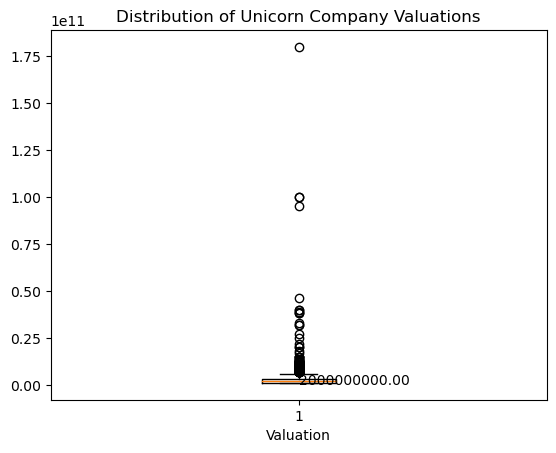

In [235]:
# To Visualize the distributton of the valuation

# Create a box plot of the unicorn company valuations
plt.boxplot(valuation)
plt.xlabel('Valuation')
plt.title('Distribution of Unicorn Company Valuations')

# Add a data label for the median valuation
plt.text(1, unicorn_data['Valuation'].median(), f'{unicorn_data["Valuation"].median():.2f}', ha='left', va='center')
plt.show()

## Observation
- It is observed that the distribution of the valuation is right-skewed, with a long tail to the right. This means that there are a few unicorn companies with very high valuations, but the majority of unicorn companies have valuations that are closer to the mean,The high valuations of some unicorn companies may be due to factors such as speculation, or the potential for future growth. The lower valuations of the majority of unicorn companies may be due to factors such as the size of their market, or the competition they face.


## Bivariate Analysis
- using bivariate to analysis Country and Valuation

In [269]:
# Top 3 Countries and Valuation

# Get the top 3 countries by valuation
top_3_countries_by_valuation = unicorn_data['Country'].value_counts().head(3)

# Print the top 3 countries and valuation
print('Top 3 countries by valuation:')
for country, valuation in top_3_countries_by_valuation.items():
  print(f'{country}: {valuation}')

Top 3 countries by valuation:
United States: 562
China: 173
India: 65


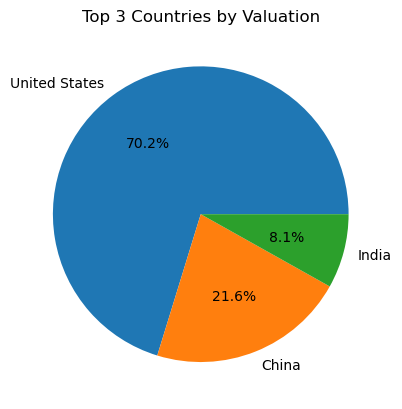

In [271]:
# To Visualize top 3 countries by valuation

import matplotlib.pyplot as plt

# Create a pie chart with data labels
plt.pie(top_3_countries_by_valuation.values, labels=top_3_countries_by_valuation.index, autopct='%1.1f%%')

# Add a title
plt.title('Top 3 Countries by Valuation')

# Show the plot
plt.show()

## Observation

- It is observed that, The United States has the most unicorn companies by far. This is due to a number of factors, including the size of the economy, the availability of capital, and the strong entrepreneurial culture.
- China is the second country with the most unicorn companies. The China has been one of the upgraded startup ecosystem in recent years, and this has helped to drive growth.
- India is the third country with the most unicorn companies. The Indian startup ecosystem is growing rapidly, and the country is expected to have more unicorn companies in the coming years.

In [275]:
# Bottom 3 Countries and Valuation

import pandas as pd

# Get the bottom 3 countries by valuation
bottom_3_countries_by_valuation = unicorn_data['Country'].value_counts().tail(3)

# Print the bottom 3 countries and valuation
print('Bottom 3 countries by valuation:')
for country, valuation in bottom_3_countries_by_valuation.items():
  print(f'{country}: {valuation}')

Bottom 3 countries by valuation:
Czech Republic: 1
Croatia: 1
Italy: 1


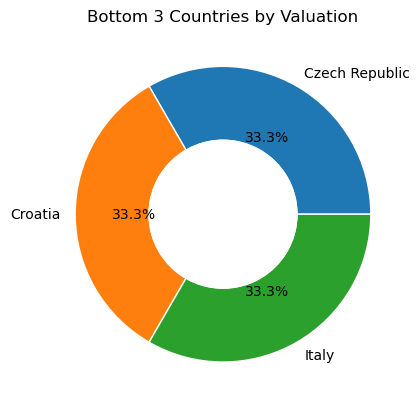

In [277]:
# To Visualize Bottom 3 countries by valuation

# Create a donut chart with data labels
fig, ax = plt.subplots()
ax.pie(bottom_3_countries_by_valuation.values, labels=bottom_3_countries_by_valuation.index, radius=1, wedgeprops=dict(width=0.5, edgecolor='w'), autopct='%1.1f%%')
# Add a circle at the center to create a donut chart
circle = plt.Circle((0, 0), 0.5, color='white')
ax.add_artist(circle)

# Add a title
plt.title('Bottom 3 Countries by Valuation')

# Show the plot
plt.show()

## Observation

- It is observed that  croatia, Cezch, and Italy are not as large as the United States, China, and India. They also have a smaller startup ecosystem and a smaller pool of skilled talent.

## Multivariate Analysis

- multivariate analysis of the valuation, industry, and country

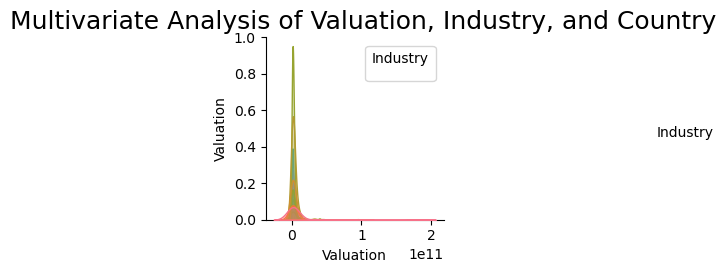

In [287]:
# to 

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set the color palette for the scatter plot matrix
colors = sns.color_palette('husl', len(unicorn_data['Industry'].unique()))

# Perform multivariate analysis using a scatter plot matrix
sns.pairplot(data=unicorn_data, vars=['Valuation'], hue='Industry', diag_kind='kde', palette=colors)

# Add a title and axis labels
plt.suptitle('Multivariate Analysis of Valuation, Industry, and Country', fontsize=18, y=1.05)
plt.xlabel('Valuation', fontsize=14)
plt.ylabel('Density', fontsize=14)

# Customize the legend
handles, labels = plt.gca().get_legend_handles_labels()
labels = unicorn_data['Industry'].unique()
plt.gca().legend(handles, labels, loc='upper right', title='Industry', fontsize=12)

# Show the plot
plt.show()

## observation

- It is observed that the multivariate analysis suggests that the valuation of a unicorn company is influenced by both its industry and its country.
- The resulting plot shows the relationship between Valuation and Industry for each country in the dataset, with each industry represented by a different color

## Overall Recommendations

- I recommend that:

- To start adopting more use of data to make decisions. Data can be a powerful tool for making better decisions. Collect data on your target market, your competitors, and the industry as a whole. Use this data to identify opportunities, assess risks, and make informed decisions about your business.

- To put having good leaders into consideration, having a good leadership team is essential for the success of any company, they should prioritize companies led by leadership teams who have a track record of success in their fields.

- To regularly assess business models; Continuously. Refine the company's business model to ensure it aligns with changing market conditions and emerging opportunities. Leverage data analysis to identify areas, for improvement or potential modifications that can enhance growth prospects.

- To build an investment portfolio by considering opportunities across industries and geographies. This will help mitigate risks associated with concentrating investments in a sector.

- To regularly Update business models based on real time data insights to ensure alignment with changing market dynamics.

- To Continuously monitor performance indicators (KPIs) related to revenue growth, customer acquisition, retention rates, profitability, etc. using these metrics as benchmarks, for evaluating business performance.